MODELO NÃO PODE SER USADO POIS RESIDUOS NÃO ESTÃO NORMALMENTE DISTRIBUIDOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [5]:
base = pd.read_csv('slr12.csv', sep=';')
base.shape

(36, 2)

In [6]:
base.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [42]:
# Definição das variáveis X e Y, X FRANQUIA ANUAL é a variável independente e Y INVESTIMENTO INICIAL é a variável dependente
X = base.iloc[:, 0].values # FRANQANUAL
y = base.iloc[:, 1].values # CUSINICIAL
X

array([1000, 1125, 1087, 1070, 1100, 1150, 1250, 1150, 1100, 1350, 1275,
       1375, 1175, 1200, 1175, 1300, 1260, 1330, 1325, 1200, 1225, 1090,
       1075, 1080, 1080, 1180, 1225, 1175, 1250, 1250,  750, 1125,  700,
        900,  900,  850])

In [43]:
# Cálculo da correlação entre X e Y
correlacao = np.corrcoef(X, y)
correlacao

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

In [44]:
# formato de matriz com uma coluna a mais
X = X.reshape(-1, 1)
# Criação do modelo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [45]:
modelo.intercept_

867.6042222620559

In [46]:
modelo.coef_

array([0.37315794])

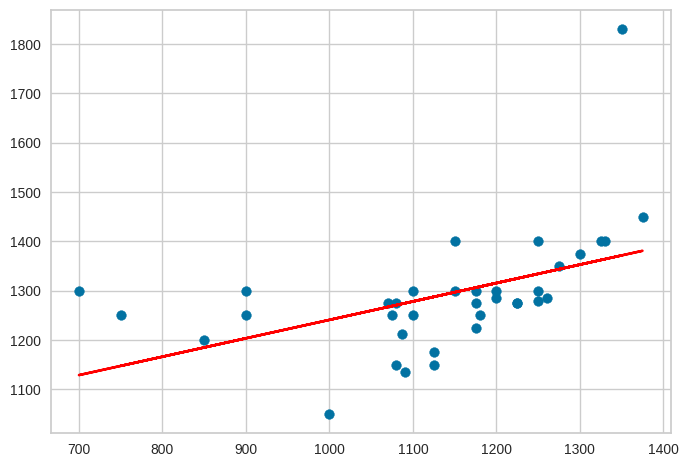

In [47]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color='red')
plt.show()

In [48]:
# Previsão de "TAXA ANUAL de 1500" usando a fórmula manual
# Interpretação + inclinação * valor de dist
modelo.intercept_ + modelo.coef_ * 1500

array([1427.34112616])

In [49]:
# Previsão utilizando função do sklearn
modelo.predict([[1500]])

array([1427.34112616])

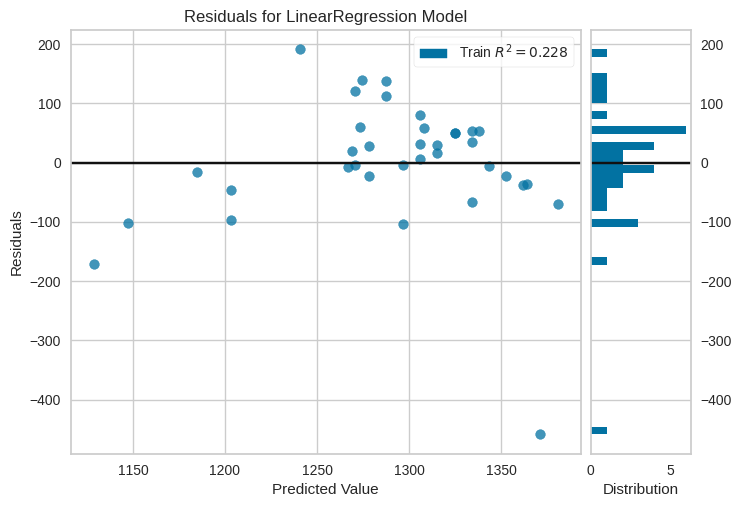

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [50]:
# Gráfico para visualizar os residuais
# não existe padronização (bom indicio)
# lembra distribuição normal (bom indicio)
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()

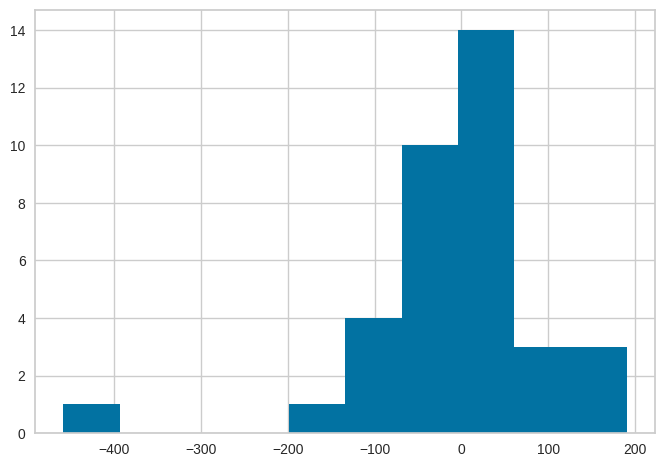

In [51]:
#Histograma de residuos
plt.hist(modelo.predict(X) - y)
plt.show()

In [52]:
#Teste de Shapiro
from scipy.stats import shapiro
shapiro(modelo.predict(X) - y)

ShapiroResult(statistic=0.8389731645584106, pvalue=0.00010717704572016373)